# Data analysis

In [1]:
import xarray as xr
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
from matplotlib import rcParams #For changing text properties
import cmocean #A package with beautiful colormaps
from cartopy import crs as ccrs #Useful for plotting maps
import cartopy.util #Requires separate import
from cartopy.util import add_cyclic_point
import cartopy.feature as cf
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.path as mpath
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
# Read data
DIR = '/nfs/spare11/env315/data/'
datafile = DIR+'total_precip_daily.nc'
data = xr.open_mfdataset(datafile).compute()
data

<xarray.Dataset> Size: 180kB
Dimensions:                   (time: 14976)
Coordinates:
    latitude                  float32 4B 42.0
    longitude                 float32 4B 286.0
  * time                      (time) datetime64[ns] 120kB 1980-01-01 ... 2020...
Data variables:
    total_precipitation_24hr  (time) float32 60kB -1.863e-08 ... 0.002345

In [4]:
# extract the variable
data = data.total_precipitation_24hr
data

<xarray.DataArray 'total_precipitation_24hr' (time: 14976)> Size: 60kB
array([-1.8626451e-08, -2.6077032e-08,  2.1876767e-06, ...,
        1.0494525e-03,  3.1683547e-04,  2.3445329e-03], dtype=float32)
Coordinates:
    latitude   float32 4B 42.0
    longitude  float32 4B 286.0
  * time       (time) datetime64[ns] 120kB 1980-01-01 1980-01-02 ... 2020-12-31
Attributes:
    long_name:   Total precipitation
    short_name:  tp
    units:       m

### Learn to select data in specific years or months

In [8]:
print(data.time.dt.year)
print(data.time.dt.month)
print(data.time.dt.day)

<xarray.DataArray 'year' (time: 14976)> Size: 120kB
array([1980, 1980, 1980, ..., 2020, 2020, 2020])
Coordinates:
    latitude   float32 4B 42.0
    longitude  float32 4B 286.0
  * time       (time) datetime64[ns] 120kB 1980-01-01 1980-01-02 ... 2020-12-31
<xarray.DataArray 'month' (time: 14976)> Size: 120kB
array([ 1,  1,  1, ..., 12, 12, 12])
Coordinates:
    latitude   float32 4B 42.0
    longitude  float32 4B 286.0
  * time       (time) datetime64[ns] 120kB 1980-01-01 1980-01-02 ... 2020-12-31
<xarray.DataArray 'day' (time: 14976)> Size: 120kB
array([ 1,  2,  3, ..., 29, 30, 31])
Coordinates:
    latitude   float32 4B 42.0
    longitude  float32 4B 286.0
  * time       (time) datetime64[ns] 120kB 1980-01-01 1980-01-02 ... 2020-12-31


In [18]:
# Extract data in May
precip_summer = data.sel(time=data.time.dt.month.isin([5]))
precip_summer

<xarray.DataArray 'total_precipitation_24hr' (time: 1271)> Size: 5kB
array([0.00130281, 0.00029486, 0.00027093, ..., 0.00194978, 0.00555648,
       0.00020882], dtype=float32)
Coordinates:
    latitude   float32 4B 42.0
    longitude  float32 4B 286.0
  * time       (time) datetime64[ns] 10kB 1980-05-01 1980-05-02 ... 2020-05-31
Attributes:
    long_name:   Total precipitation
    short_name:  tp
    units:       m

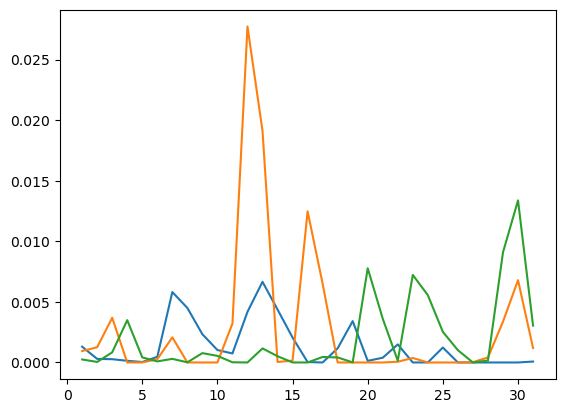

In [21]:
plt.plot(np.arange(1,32),precip_summer.sel(time=precip_summer.time.dt.year.isin([1980])))
plt.plot(np.arange(1,32),precip_summer.sel(time=precip_summer.time.dt.year.isin([1981])))
plt.plot(np.arange(1,32),precip_summer.sel(time=precip_summer.time.dt.year.isin([1982])))

## Boxplots
#### https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html